# Code for geometry files

### Importing the geometry file

In [38]:
import numpy as np
import random
import matplotlib.pyplot as plt
import skimage.morphology as mor
from skimage import measure
import copy

## What I want to do

Import numpy
Import scypy 

Load inn array
Pick ij coordinate at radom (1,1022)
Image coordinate (i,j)
See if the coordinates are the same
If not the same load the coordinates into a text file


# Here we are differentiating between tripple junctions and gbs

In [55]:
img = np.loadtxt('1024x1024_N128_numpy.geom')
up = np.roll(img,1, axis = 0)
down = np.roll(img,-1, axis = 0)
right = np.roll(img,1, axis = 1)
left = np.roll(img,-1, axis = 1)

# Make a 3d array and swap the axes to make it easier to manage
a_3d_array = np.array([img,up,down,right,left]).swapaxes(0,2).swapaxes(0,1)

# Make an empty array of the same size as img
unique_points = np.zeros(np.shape(img))

# Go though the (1024, 1024) part of the array, and find the number of unique numbers across the 5 maps
for yidx, y_vals in enumerate(a_3d_array):
    for xidx, val in enumerate(y_vals):
        if len(np.unique(val)) > 1:
            unique_points[yidx][xidx] = len(np.unique(val))
        if len(np.unique(val)) == 1:
            unique_points[yidx][xidx] = -1
 

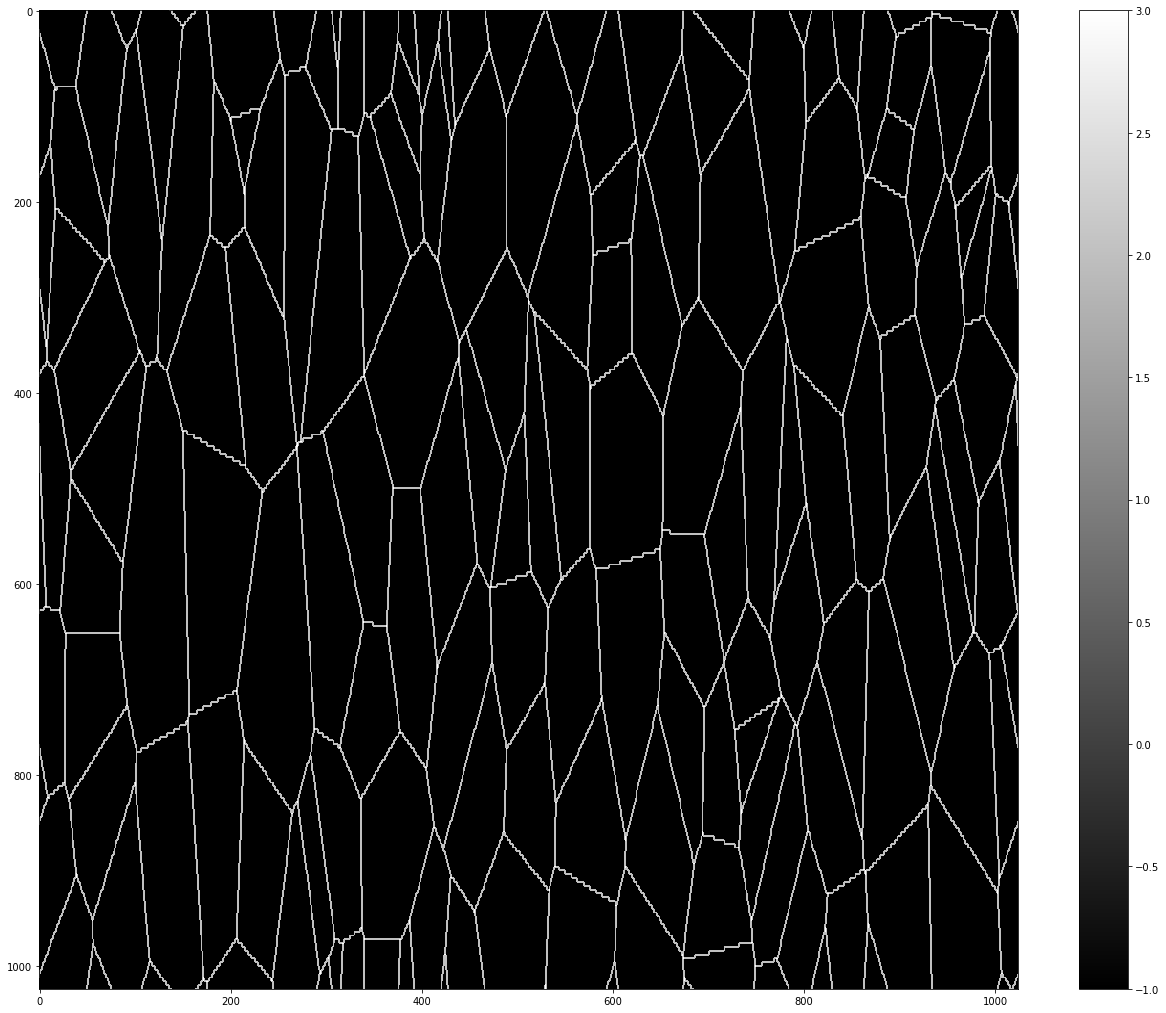

In [56]:
plt.figure(figsize=(22,18))
plt.imshow(img, cmap='viridis')
plt.imshow(unique_points, cmap='gray', vmax=3)

plt.colorbar()

# ORIGINAL MAP IS IN COLOURS
# BOUNDARIES IN BLACK
# TRIPLE POINTS IN WHITE

# Here I am making suub_grains in my microstructure

Grain ID: 0 has area 3080 and 5 random coords will be generated
Grain ID: 1 has area 7016 and 5 random coords will be generated
Grain ID: 2 has area 704 and 5 random coords will be generated
Grain ID: 3 has area 6248 and 5 random coords will be generated
Grain ID: 4 has area 228 and 5 random coords will be generated
Grain ID: 5 has area 13424 and 5 random coords will be generated
Grain ID: 6 has area 6680 and 5 random coords will be generated
Grain ID: 7 has area 2200 and 5 random coords will be generated
Grain ID: 8 has area 2828 and 5 random coords will be generated
Grain ID: 9 has area 324 and 5 random coords will be generated
Grain ID: 10 has area 3324 and 5 random coords will be generated
Grain ID: 11 has area 3296 and 5 random coords will be generated
Grain ID: 12 has area 1116 and 5 random coords will be generated
Grain ID: 13 has area 1796 and 5 random coords will be generated
Grain ID: 14 has area 1200 and 5 random coords will be generated
Grain ID: 15 has area 3268 and 5 rand

Grain ID: 127 has area 9868 and 5 random coords will be generated
Grain ID: 128 has area 14660 and 5 random coords will be generated
Grain ID: 129 has area 6996 and 5 random coords will be generated
Grain ID: 130 has area 7800 and 5 random coords will be generated
Grain ID: 131 has area 12160 and 5 random coords will be generated
Grain ID: 132 has area 9272 and 5 random coords will be generated
Grain ID: 133 has area 356 and 5 random coords will be generated
Grain ID: 134 has area 3880 and 5 random coords will be generated
Grain ID: 135 has area 4952 and 5 random coords will be generated
Grain ID: 136 has area 7684 and 5 random coords will be generated
Grain ID: 137 has area 11356 and 5 random coords will be generated
Grain ID: 138 has area 5492 and 5 random coords will be generated
Grain ID: 139 has area 9688 and 5 random coords will be generated
Grain ID: 140 has area 2656 and 5 random coords will be generated
Grain ID: 141 has area 4972 and 5 random coords will be generated
Grain ID

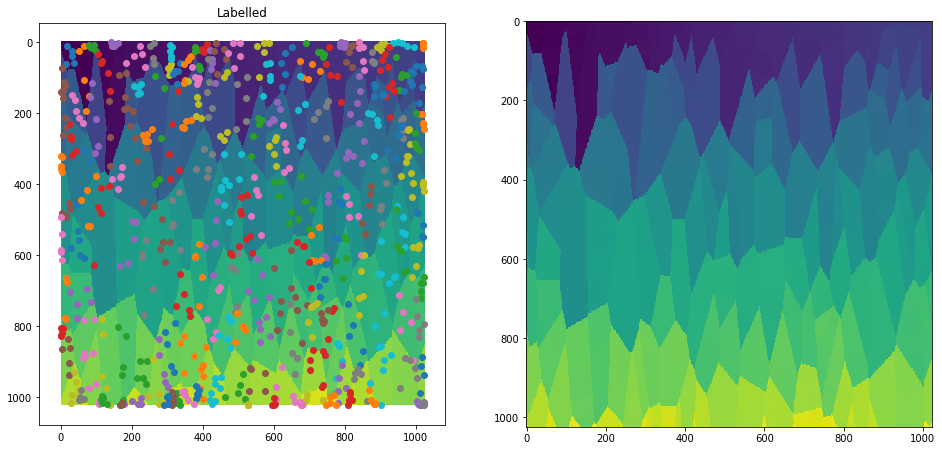

In [57]:
# Find the grains
all_labels = measure.label(img)
max_val = np.max(all_labels)

new_map = copy.deepcopy(all_labels)

# Get grain properties
properties = measure.regionprops(all_labels)
area_list = [prop.area for prop in properties]
coord_list = [prop.coords for prop in properties]

# Plot the data
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(16,14))
#ax1.imshow(img, cmap='gray')
#ax1.set_title('original')
ax2.imshow(all_labels, cmap='viridis')
ax2.set_title('Labelled')

# Find all grains which are above a certain area
for idx, (area, coords) in enumerate(zip(area_list, coord_list)):
    max_phase = np.max(new_map)
    if area < 35000:
        numrand = int(5)
        
        print('Grain ID: {0} has area {1} and {2} random coords will be generated'.format(idx, area, numrand))
        
        # Find random numbers and get coords     NOTE: THEY ARE (Y,X)!!
        random_ids = np.random.choice(len(coords), numrand)
        random_coords = coords[random_ids]
        
        # Plot the random points
        ax2.scatter(random_coords.transpose()[1], random_coords.transpose()[0])
        
        
        
        # For each coordinate in a grain
        for coord in coords:
            dist=[]
            # Find distance to each random point
            for random_coord in random_coords:
                dist.append(np.sqrt((random_coord[1]-coord[1])**2+(random_coord[0]-coord[0])**2))

            # Reassign grain ID
            new_map[coord[0]][coord[1]] = max_phase + np.argmin(dist) +1
                
      
           
    
ax3.imshow(new_map, cmap='viridis', vmin=max_val)




# Here I want to add the RXA points to the microstrucutre

64366


/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: This function is deprecated. Please call randint(0, 748 + 1) instead
/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: This function is deprecated. Please call randint(0, 64366 + 1) instead


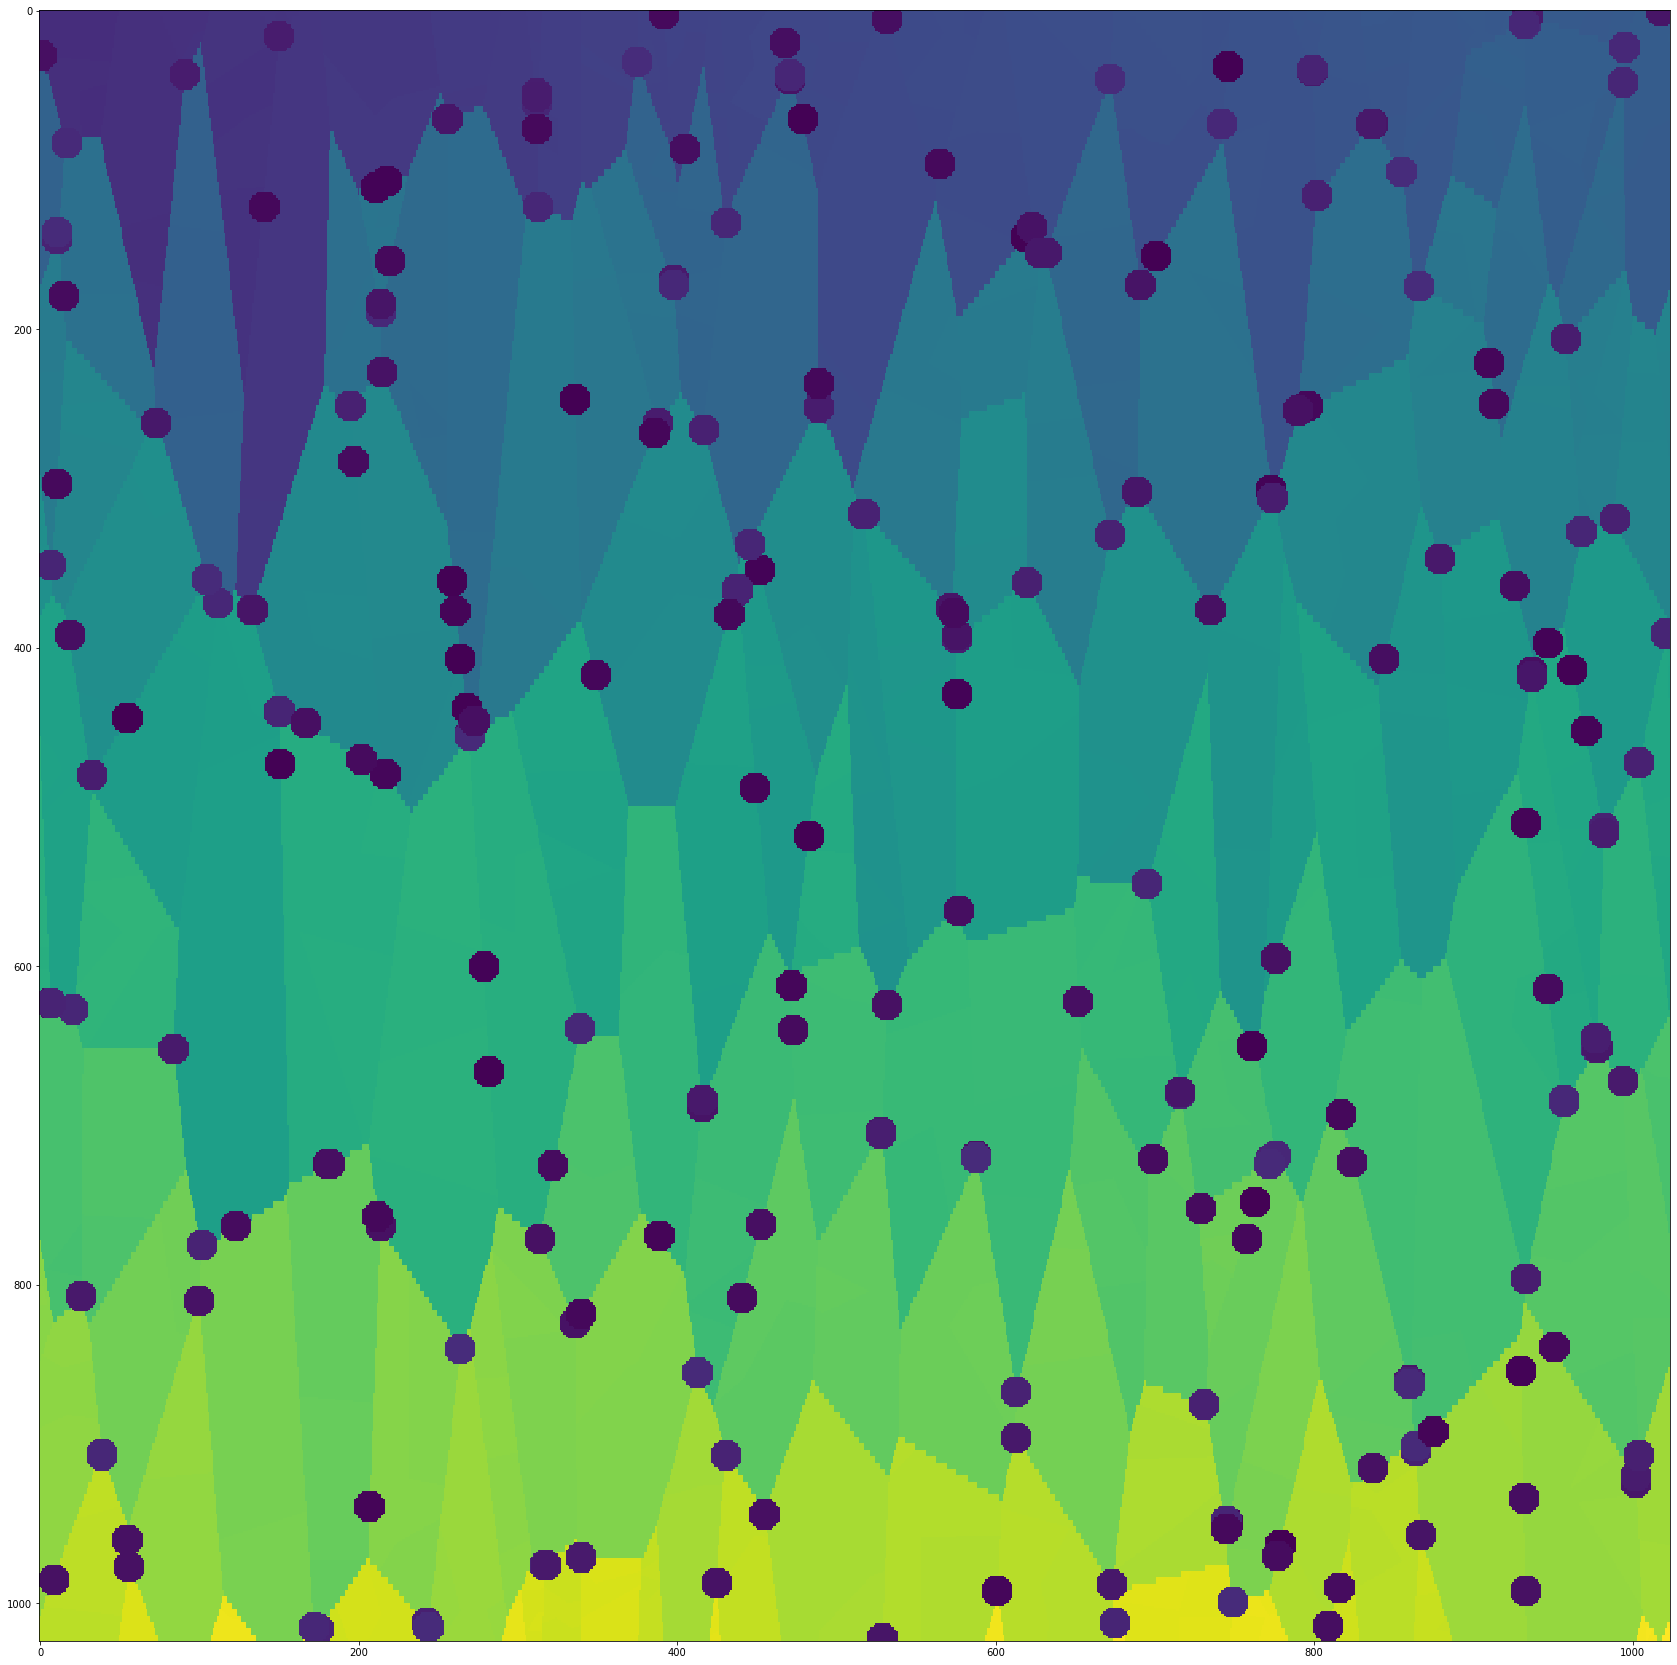

In [65]:
# create a list of all the coordinates of poirnts with values = 3 tripple junctions and another one for grain boundaries

#print(unique_points)
triple_junction = []
for yidx, y_vals in enumerate(unique_points):
    for xidx, val in enumerate(y_vals):
        if val > 2:
            triple_junction.append([xidx, yidx])
            
normal_grain_boundaries = []
for yidx, y_vals in enumerate(unique_points):
    for xidx, val in enumerate(y_vals):
        if val == 2:
            normal_grain_boundaries.append([xidx, yidx])
  

#print(triple_junction)
print(len(normal_grain_boundaries))


# now add the points to the microstrucutre
X,Y = np.meshgrid(range(1024),range(1024))
seed_radius = 10
for n in range(84):
    random_point_tj = np.random.random_integers(0,len(triple_junction))
    new_img = \
    np.where((X-triple_junction[random_point_tj][0])*(X-triple_junction[random_point_tj][0]) + \
             (Y-triple_junction[random_point_tj][1])*(Y-triple_junction[random_point_tj][1]) < seed_radius*seed_radius, \
             84+n,img)
    img = np.copy(new_img)
    
for n in range(44):
    random_point_gb = np.random.random_integers(0,len(normal_grain_boundaries))
    new_img2 = \
    np.where((X-normal_grain_boundaries[random_point_gb][0])*(X-normal_grain_boundaries[random_point_gb][0]) + \
             (Y-normal_grain_boundaries[random_point_gb][1])*(Y-normal_grain_boundaries[random_point_gb][1]) < seed_radius*seed_radius, \
             44+n,img)
    img = np.copy(new_img2)    
#np.savetxt('1024x1024_N128_RX.geom',new_img,fmt='%d')
plt.figure(figsize=(30, 30))
plt.imshow(img)

np.savetxt('1024x1024_N128_RX_triple_junctions.geom',new_img2,fmt='%d')



